# Analysis for figure S3

## Installations & Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
import os
import shap
import joblib
shap.initjs()

warnings.simplefilter('ignore', pd.errors.DtypeWarning)
np.seterr(divide='ignore')
warnings.simplefilter("ignore")

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../..'))

import analysis.calc_single_cell_properties as calculator 
import analysis.calc_auc_over_time as auc_calculator 
import analysis.utils as utils
import data_layer.utils as data_utils
from configuration import consts

In [6]:
def get_explainer(path, save_path=None, palette="Reds_r"):
    """
    Loads a trained classifier, computes SHAP values, and visualizes feature importance.

    Args:
        path (str): Path to the directory containing the classifier and input data.
        save_path (str, optional): Path to save the plot. Defaults to None.
        palette (str, optional): Palette for the bar plot. Defaults to "Reds_r".

    Returns:
        tuple: Tuple containing the input data, explainer object, and SHAP values.
    """
    clf = joblib.load(path + "/clf.joblib")
    x_test = pd.read_csv(path + "/" + "X_test", encoding="cp1252")
    drop_cols = ["Spot track ID"]
    if "Unnamed: 0" in x_test.columns:
        drop_cols.append("Unnamed: 0")
    
    explainer = shap.explainers.Tree(clf)
    shap_values = explainer.shap_values(x_test.drop(columns=drop_cols))
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(clf.feature_importances_)
    feature_names = np.array(x_test.drop(columns=drop_cols).columns)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    n_features = 15
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(data=fi_df.iloc[:n_features], x='feature_importance', y='feature_names',palette=palette)
    #Add chart labels
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    if save_path:
        plt.savefig(save_path + ".eps", format="eps")
    plt.show()
    
    return x_test, explainer, shap_values

feature importance for motility features classifier:

RandomForestClassifier(max_depth=8)


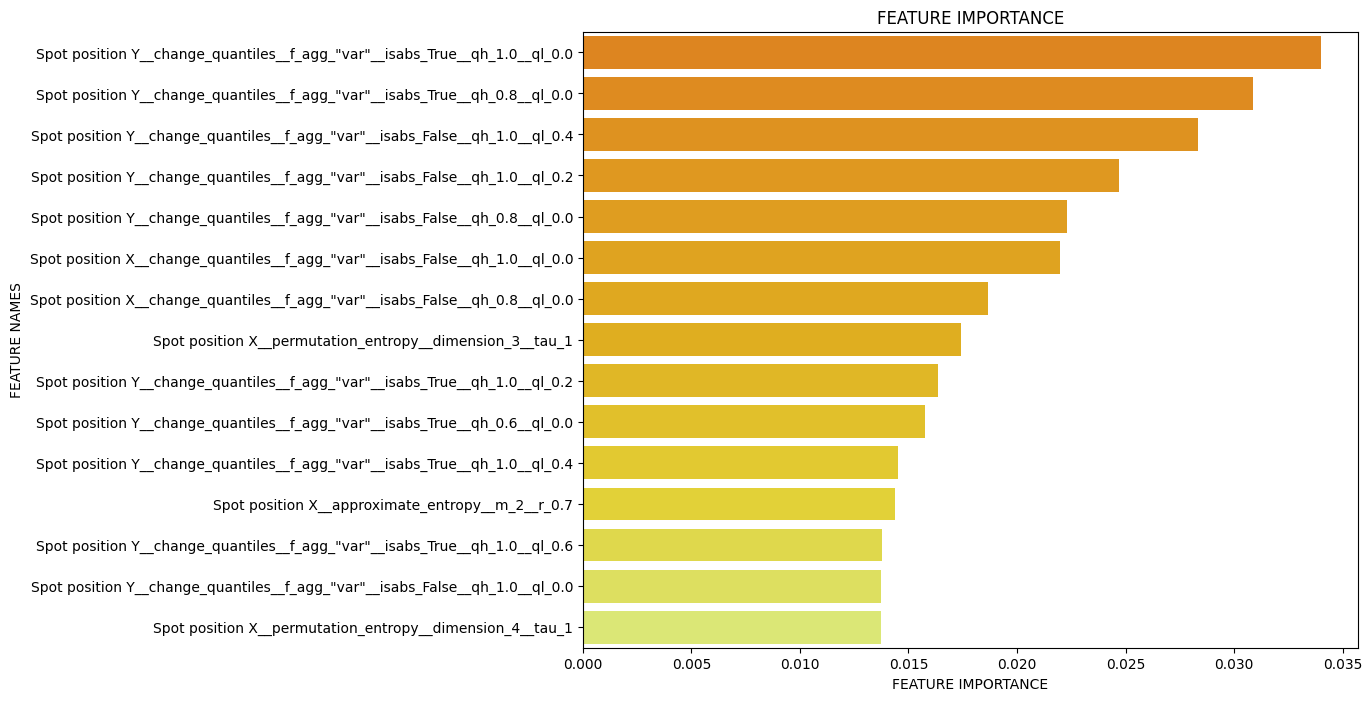

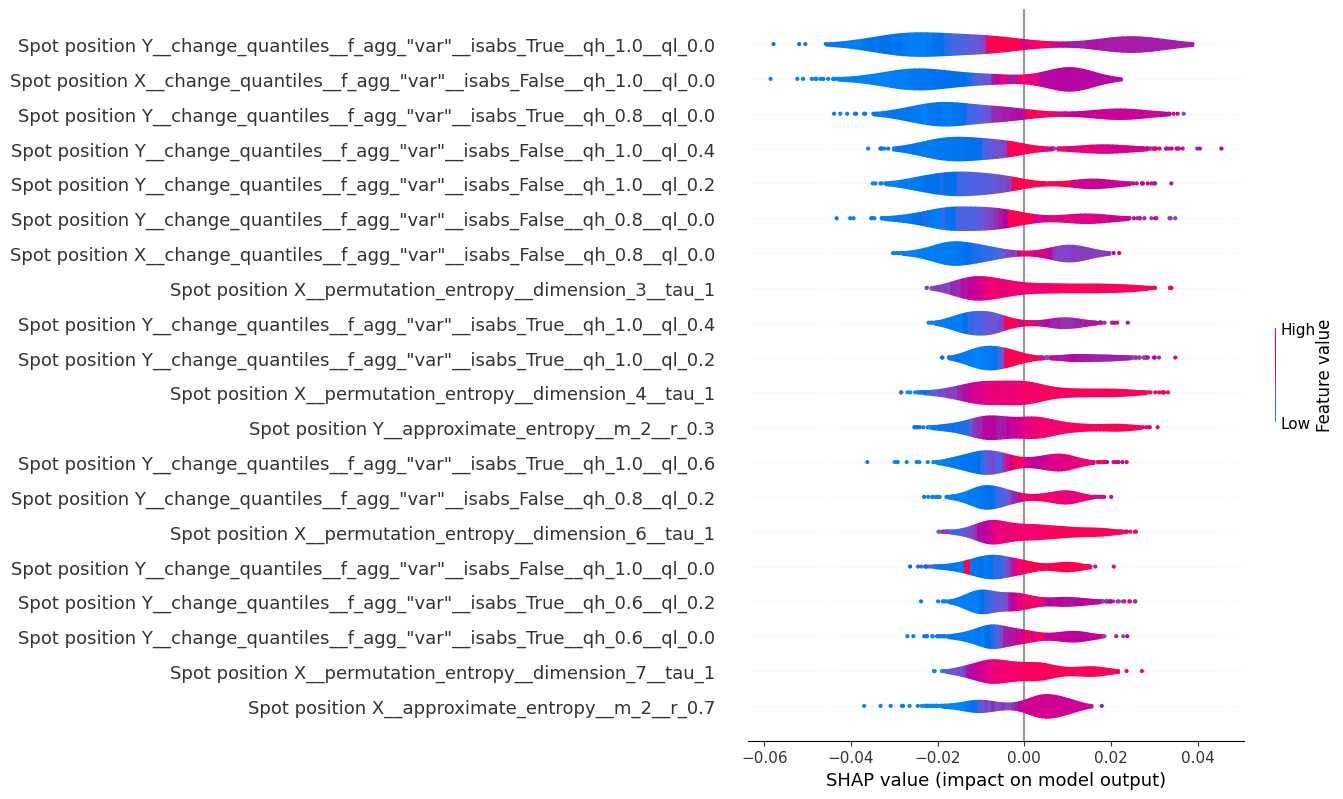

In [7]:
path_mot = consts.motility_model_path % (1, 5)
mot_x_test, mot_explainer, mot_shap_values =get_explainer(path_mot, save_path=consts.storage_path + "eps_figs/feature importance motility", palette="Wistia_r")
shap.summary_plot(mot_shap_values[0], mot_x_test.drop(columns=["Spot track ID"]),  plot_type='violin', show=False)
plt.savefig(consts.storage_path + "eps_figs/shap summary plot motility.eps", format="eps")
plt.show()

feature importance for actin features classifier:

RandomForestClassifier(max_depth=8)


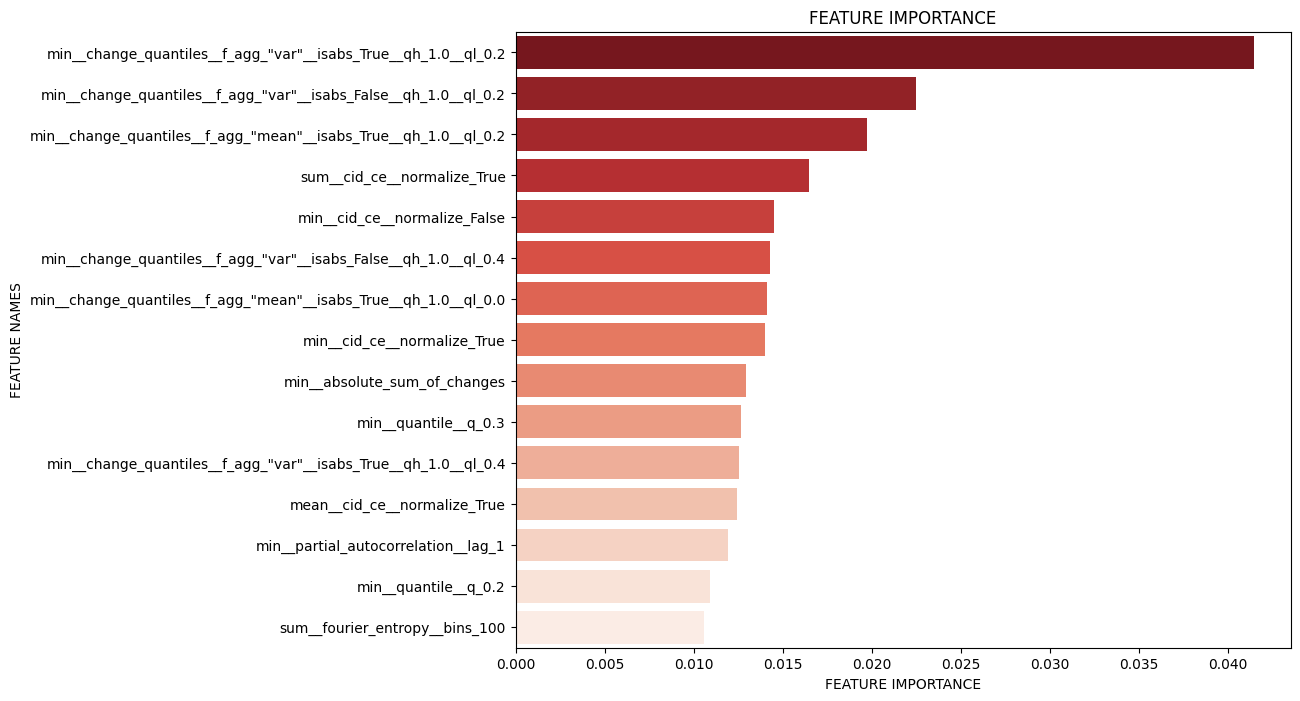

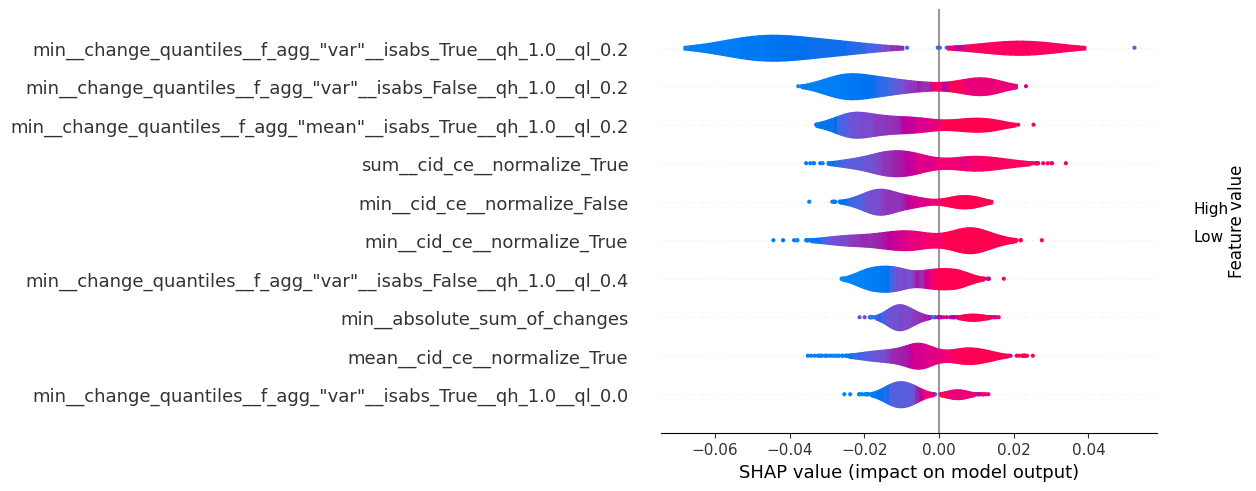

In [8]:
path_int = consts.intensity_model_path % (1, 5)
int_x_test, int_explainer, int_shap_values =get_explainer(path_int, save_path=consts.storage_path + "eps_figs/feature importance intensity", palette="Reds_r")
shap.summary_plot(int_shap_values[0], int_x_test.drop(columns=["Spot track ID"]), max_display=10,  plot_type='violin',show=False)
plt.savefig(consts.storage_path + "eps_figs/shap summary plot intensity.eps", format="eps")
plt.show()